In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [3]:
# data.drop('rssi', axis=1, inplace=True)
# data.drop('rssi1', axis=1, inplace=True)
# data.drop('rssi2', axis=1, inplace=True)
# data.drop('rssi3', axis=1, inplace=True)
# data.drop(columns=["timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers', 'csi_len', 'channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'payload_length', 'block_length', 'with_receiver'], axis=1, inplace=True)

# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)
# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)


In [4]:
data.drop(columns=['ant1_amplitude', 'ant2_amplitude', 'subcarriers','coord1', 'coord2'], inplace=True)

In [5]:

features_scaled = ["ant1_phase", "ant2_phase", "rssi", "rssi1", "rssi2"]
X = data.copy()
features = data.columns

# Separate the columns that need to be scaled
columns_to_scale = [col for col in X.columns if col not in features_scaled]

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the columns that need to be scaled
X_scaled_part = scaler.fit_transform(X[columns_to_scale])

# Create a DataFrame for the scaled part, with the correct column names
X_scaled_df = pd.DataFrame(X_scaled_part, columns=columns_to_scale)

# Combine the scaled columns with the unscaled columns
X_scaled = pd.concat([X_scaled_df, X[features_scaled]], axis=1)

# Reorder columns to match the original DataFrame's structure (optional)
X_scaled = X_scaled[X.columns]

X_scaled.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,rssi1,rssi2,rssi3,payload_length,block_length,ant1_phase,ant2_phase,with_receiver,ant1_amplitude_cluster,ant2_amplitude_cluster
0,1.220259,-2.537797,0.00245,-0.009041,0.0,-1.719826,0.0,0.0,0.0,-2.537797,...,-0.692259,-0.804275,0.0,0.780415,-0.819034,0.766030,0.970214,0.0,-1.279673,-1.318489
1,1.220259,-2.537797,0.00245,-0.009041,0.0,-1.719826,0.0,0.0,0.0,-2.537797,...,-0.692259,-0.804275,0.0,0.780415,-0.819034,0.718191,0.925932,0.0,-1.279673,-1.318489
2,1.220259,-2.537797,0.00245,-0.009041,0.0,-1.719826,0.0,0.0,0.0,-2.537797,...,-0.692259,-0.804275,0.0,0.780415,-0.819034,0.687843,0.903455,0.0,-1.279673,-1.318489
3,1.220259,-2.537797,0.00245,-0.009041,0.0,-1.719826,0.0,0.0,0.0,-2.537797,...,-0.692259,-0.804275,0.0,0.780415,-0.819034,0.707981,0.922570,0.0,-1.279673,-1.318489
4,1.220259,-2.537797,0.00245,-0.009041,0.0,-1.719826,0.0,0.0,0.0,-2.537797,...,-0.692259,-0.804275,0.0,0.780415,-0.819034,0.696637,0.922810,0.0,-1.279673,-1.318489


In [6]:
for i in range(1, X_scaled.shape[0]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    # print(f'Explained variance by each component: {explained_variance}')
    print(f"PCA with {i} components, sum is {sum(explained_variance)}.")
    
    if (sum(explained_variance) >= 0.85):
        break

X_pca = pca.fit_transform(X_scaled)

PCA with 1 components, sum is 0.24049324913914202.
PCA with 2 components, sum is 0.3586564964908079.
PCA with 3 components, sum is 0.469803615605345.
PCA with 4 components, sum is 0.5485409141341773.
PCA with 5 components, sum is 0.6256675286850331.
PCA with 6 components, sum is 0.6973578957768857.
PCA with 7 components, sum is 0.768968598606911.
PCA with 8 components, sum is 0.838373530301395.
PCA with 9 components, sum is 0.9030346768376885.


In [7]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.24049325 0.11816325 0.11114712 0.0787373  0.07712661 0.07169037
 0.0716107  0.06940493 0.06466115]


In [8]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [9]:
print(features)

Index(['timestamps', 'csi_len', 'channel', 'err_info', 'noise_floor', 'rate',
       'bandWidth', 'num_tones', 'nr', 'nc', 'rssi', 'rssi1', 'rssi2', 'rssi3',
       'payload_length', 'block_length', 'ant1_phase', 'ant2_phase',
       'with_receiver', 'ant1_amplitude_cluster', 'ant2_amplitude_cluster'],
      dtype='object')


In [10]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=data.columns)

print(loading_df)


   timestamps   csi_len   channel  err_info   noise_floor      rate  \
0   -0.042018  0.518942 -0.001054 -0.016710  1.734723e-18  0.485207   
1   -0.018713  0.000613  0.002676  0.014694 -5.551115e-17 -0.085117   
2    0.038579 -0.202194 -0.005417  0.015890  5.551115e-17 -0.172382   
3   -0.004710 -0.000888  0.010531 -0.012000 -2.341877e-17 -0.000588   
4   -0.499930 -0.067686 -0.023100  0.041453  1.110223e-16 -0.170369   
5    0.049931 -0.001972  0.982574  0.171489 -2.476318e-16 -0.004983   
6    0.046392  0.012847 -0.173082  0.982840 -3.282964e-16  0.017767   
7    0.857945 -0.015888 -0.061803 -0.041666  5.551115e-17 -0.067090   
8    0.007133 -0.001228  0.001822  0.001709 -9.540979e-18 -0.002830   

      bandWidth     num_tones            nr        nc  ...     rssi1  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.518942  ... -0.044786   
1 -0.000000e+00 -0.000000e+00 -0.000000e+00  0.000613  ...  0.463570   
2  0.000000e+00  0.000000e+00  0.000000e+00 -0.202194  ... -0.175879   
3

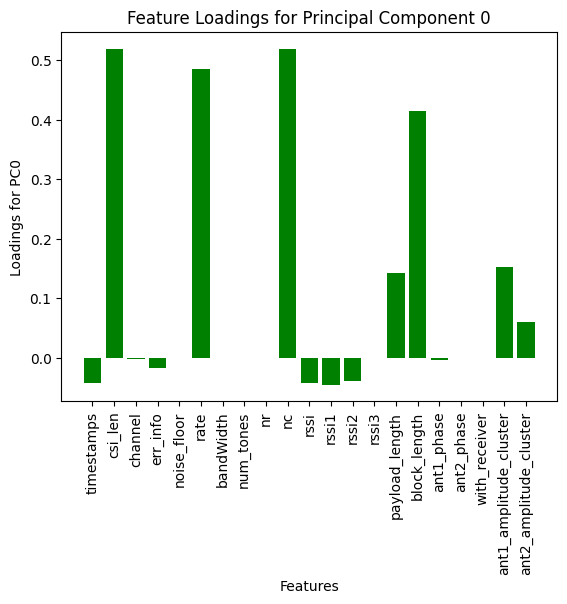

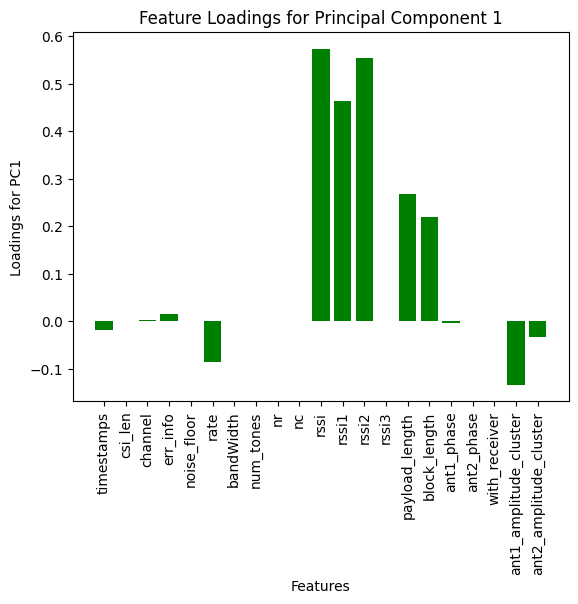

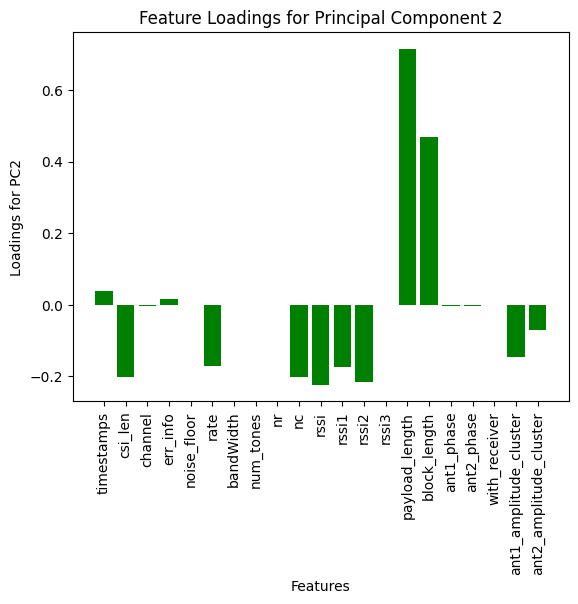

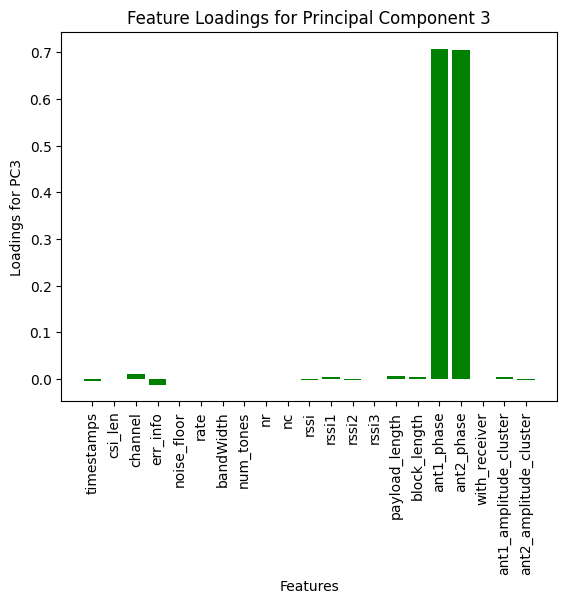

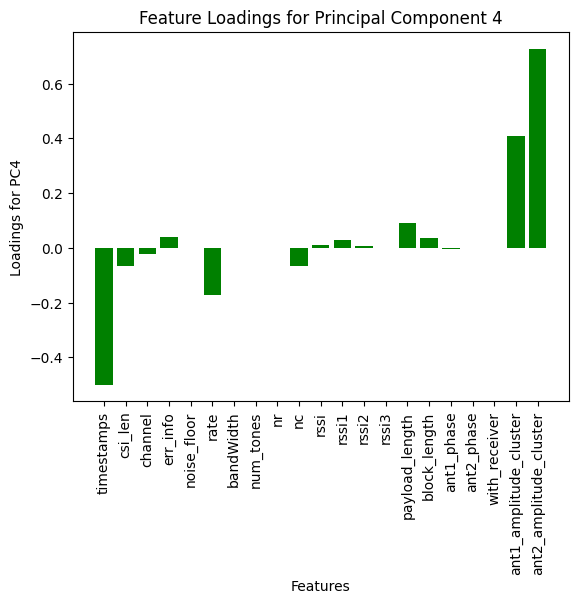

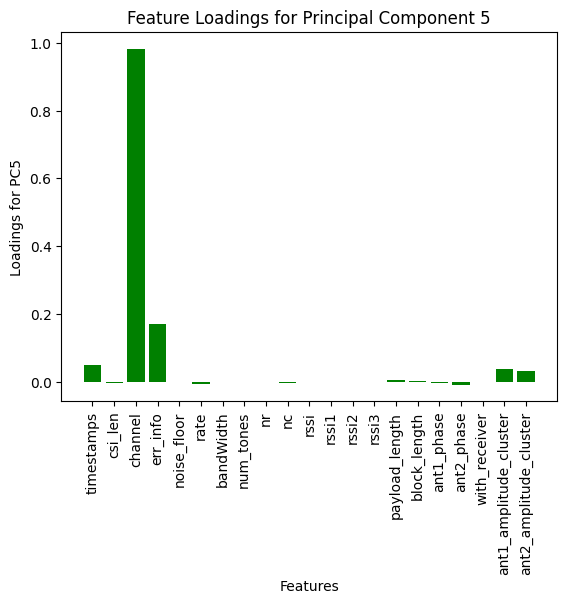

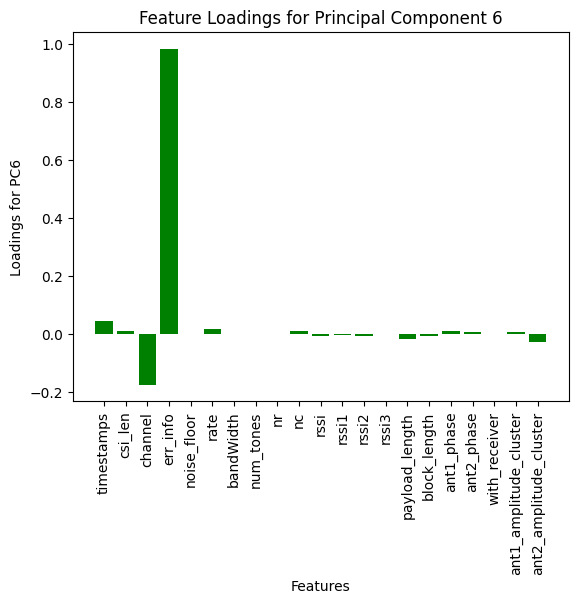

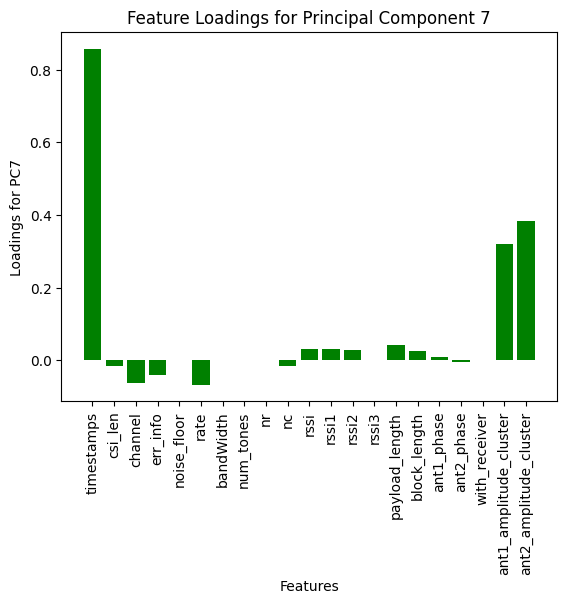

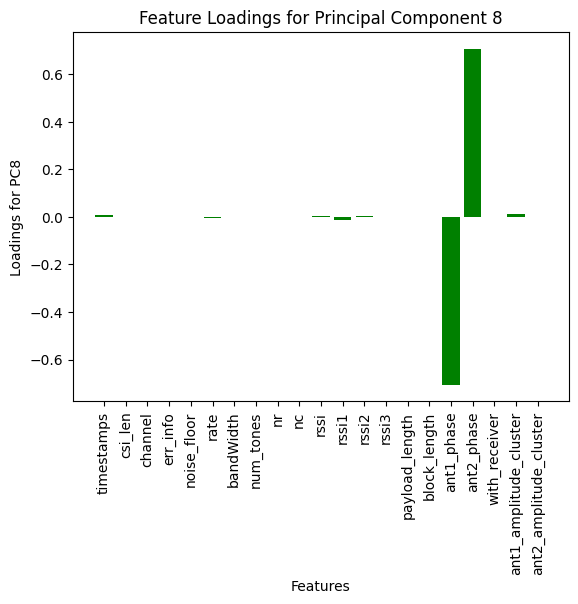

In [11]:
for j in range(i):
    plt.bar(features, loadings[j], color='g')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Loadings for PC{j}')
    plt.title(f'Feature Loadings for Principal Component {j}')
    plt.show()


In [12]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.24049325 0.3586565  0.46980362 0.54854091 0.62566753 0.6973579
 0.7689686  0.83837353 0.90303468]


In [13]:
pca = PCA(n_components=i)
X_reduced = pca.fit_transform(X)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [1.00000000e+00 2.23862277e-14 5.96874978e-15 9.24387359e-16
 4.87177845e-16 1.12333204e-18 7.05311936e-19 5.62742114e-19
 4.62147035e-19]
SUM: 0.9999999999999999


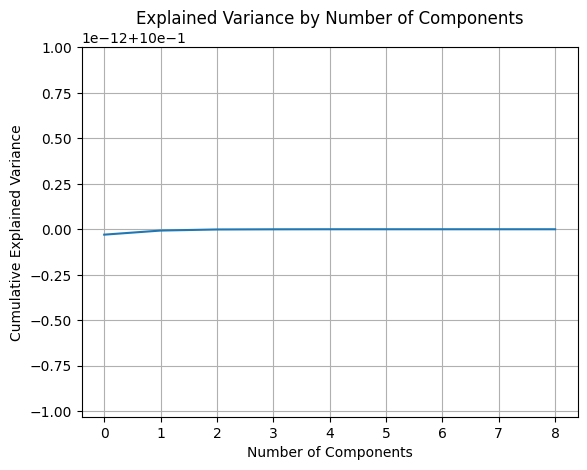

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [15]:
# Remove exact duplicates
# df = pd.DataFrame(X_reduced)
# X_reduced_deduped = df.drop_duplicates()
